In [81]:
import numpy as np
import pandas as pd
#dataset import
dataset = pd.read_csv("../data/train.csv") #You need to change #directory accordingly
dataset.head(10)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
5,1859,0,0.5,1,3,0,22,0.7,164,1,...,1004,1654,1067,17,1,10,1,0,0,1
6,1821,0,1.7,0,4,1,10,0.8,139,8,...,381,1018,3220,13,8,18,1,0,1,3
7,1954,0,0.5,1,0,0,24,0.8,187,4,...,512,1149,700,16,3,5,1,1,1,0
8,1445,1,0.5,0,0,0,53,0.7,174,7,...,386,836,1099,17,1,20,1,0,0,0
9,509,1,0.6,1,2,1,9,0.1,93,5,...,1137,1224,513,19,10,12,1,0,0,0


In [82]:
#Changing pandas dataframe to numpy array
X = dataset.iloc[:,:20].values
y = dataset.iloc[:,20:21].values

In [83]:
#Normalizing the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [84]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
y = ohe.fit_transform(y).toarray()

In [85]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.1)

In [86]:
#Dependencies
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [93]:
# Neural network
model = Sequential()
model.add(Dense(16, input_dim=20, activation = "relu"))
model.add(Dense(12, activation="relu"))
model.add(Dense(4, activation="softmax"))

In [94]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [95]:
history = model.fit(X_train, y_train,validation_data = (X_test,y_test), epochs=100, batch_size=64)

Epoch 1/100
29/29 [==============================] - 1s 13ms/step - loss: 1.5287 - accuracy: 0.2485 - val_loss: 1.4023 - val_accuracy: 0.2600
Epoch 2/100
29/29 [==============================] - 0s 3ms/step - loss: 1.3817 - accuracy: 0.2998 - val_loss: 1.3211 - val_accuracy: 0.3550
Epoch 3/100
29/29 [==============================] - 0s 2ms/step - loss: 1.3152 - accuracy: 0.3824 - val_loss: 1.2660 - val_accuracy: 0.4400
Epoch 4/100
29/29 [==============================] - 0s 2ms/step - loss: 1.2556 - accuracy: 0.4533 - val_loss: 1.2079 - val_accuracy: 0.4850
Epoch 5/100
29/29 [==============================] - 0s 2ms/step - loss: 1.1919 - accuracy: 0.5130 - val_loss: 1.1447 - val_accuracy: 0.5200
Epoch 6/100
29/29 [==============================] - 0s 2ms/step - loss: 1.1173 - accuracy: 0.5411 - val_loss: 1.0742 - val_accuracy: 0.5350
Epoch 7/100
29/29 [==============================] - 0s 2ms/step - loss: 1.0579 - accuracy: 0.5659 - val_loss: 0.9990 - val_accuracy: 0.5700
Epoch 8/100


Epoch 59/100
29/29 [==============================] - 0s 2ms/step - loss: 0.0895 - accuracy: 0.9782 - val_loss: 0.2177 - val_accuracy: 0.9000
Epoch 60/100
29/29 [==============================] - 0s 2ms/step - loss: 0.0879 - accuracy: 0.9872 - val_loss: 0.2170 - val_accuracy: 0.8950
Epoch 61/100
29/29 [==============================] - 0s 2ms/step - loss: 0.0873 - accuracy: 0.9799 - val_loss: 0.2212 - val_accuracy: 0.8850
Epoch 62/100
29/29 [==============================] - 0s 2ms/step - loss: 0.0809 - accuracy: 0.9823 - val_loss: 0.2173 - val_accuracy: 0.8950
Epoch 63/100
29/29 [==============================] - 0s 2ms/step - loss: 0.0739 - accuracy: 0.9814 - val_loss: 0.2220 - val_accuracy: 0.8950
Epoch 64/100
29/29 [==============================] - 0s 2ms/step - loss: 0.0801 - accuracy: 0.9857 - val_loss: 0.2227 - val_accuracy: 0.8950
Epoch 65/100
29/29 [==============================] - 0s 2ms/step - loss: 0.0743 - accuracy: 0.9857 - val_loss: 0.2175 - val_accuracy: 0.9000
Epoch 

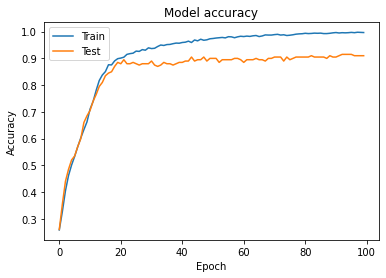

In [96]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

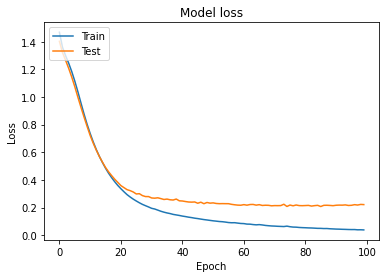

In [97]:
plt.plot(history.history['loss']) 
plt.plot(history.history['val_loss']) 
plt.title('Model loss') 
plt.ylabel('Loss') 
plt.xlabel('Epoch') 
plt.legend(['Train', 'Test'], loc='upper left') 
plt.show()